# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2023-02-18 04:00:40--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-18 04:00:40 (273 MB/s) - ‘test.dat’ saved [2844/2844]

--2023-02-18 04:00:40--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2023-02-18 04:00:41 (298 MB/s) - ‘train.dat’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
     return sum([w * x for w, x in zip(array1, array2)])


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    #This is not implemented in the main() function directly
    in_value=dot_product(weights,instance)
    output=sigmoid(in_value)
    return output

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    if sigmoid(dot_product(weights, instance)) >= 0.5:
        return 1
    return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    #TODO: name this step
    #Initializing the weights(Initially the weight is assigned to 0 for the model to learn and assign itself)
    weights = [0] * (len(instances[0])-1)

    while epochs > 0:
        for instance in instances:
            #TODO: name these steps
            #To determine how much two vectors overlap, we use the dot product also called feedforward
            #output is used to call sigmoid function (activation function) to change the output to non-linearity
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Updating the weights using back propagation
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

        epochs -= 1
        if epochs == 0:
            break

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




## **Solution-1:**

## **Dot product function**

To determine how much two vectors overlap, we use the dot product. The output of dot product is a single values. The dot product is conducted in a neural network between a weight matrix and an input vector. In the above code dot product is the overlap between weights and instances.

## **Sigmoid Function**

Sigmoid is an activation function. It is used to change the output to non-linearity since maximum of real-world applications contains complex patterns and linear approach wont fit those type of models and relations. It converts any output values interms of 0 or 1.

In the above code predict is not used as it gives output as -1 to 1. It can be used in models where we need to distinguish the data into 2 classes. We can thus use sigmoid to find the probability between actual ouput and predicted output which helps in adjusting the overal weights.

## **Comment the training function and run it**

In [5]:
#instances_tr = read_data("train.dat") 
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_te, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_te):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


**Commenting the training code and using direct testing data will not give greater accuracy. Using training data, parameters are learned continuousy and based on the best accuracy, those parameters are applied on the test data.**

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

## **Answer 2:**

In [7]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]
lr = [0.005, 0.01, 0.05] 
num_epochs = [5, 10, 20, 50, 100]
for z in range (len(tr_percent)):
 for i in range (len(lr)):
  for j in range (len(num_epochs)):
   weights = train_perceptron(instances_tr, lr[i], num_epochs[j])
   accuracy = get_accuracy(weights, instances_te)
   print(f"#tr: {((len(instances_tr))*(tr_percent[z]))/100:3}, epochs: {num_epochs[j]:3}, learning rate: {lr[i]:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20.0, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20.0, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20.0, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20.0, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 20.0, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20.0, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20.0, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 20.0, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 20.0, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 77.0
#tr: 20.0, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20.0, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 20.0, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr:

**In the code we can see how for different percentages of training data with respect to different values of epochs and learning rate is effecting the accuracy. We can conclude that the accuracy doesn't only depend on the percentage of trained data but also on the other hyperparameters.**

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



## **Solution-3a:**

3a) To achieve the best accuracy, the model need not be trained with all the training dataset as it may lead to overfitting. The model can be trained on the training data and then validated using validation data before applying on testing data. The accuracy of validated data can be measured, and depending on the accuracy, the hyperparameters can be adjusted. As observed in the above output, the accuracy for 5% of training data with epoch=20 and lr=0.05 yields maximum accuracy of 80 % and by utilizing 100% of training data with hyperparameter values as epoch=100, learning rate: 0.010 also gives maximm accuracy of 80% on test data. So, training the model with maximum training data will not increase the accuracy on the test data.

## **Solution-3b**

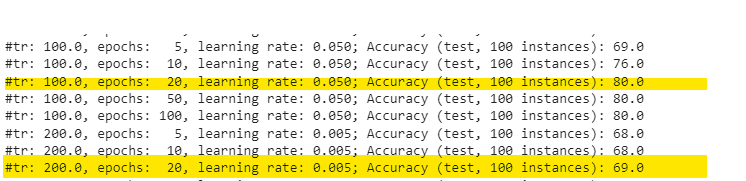

As seen in the output, the training data with 25% training data(tr=100) and epoch=20 has accuracy of 80% and while the second run with 50% training data(tr=200) has accuracy of 69%. This is due to Hyperparameter tuning. The hyperparameters are different for both the training data set. The learning rate varies for both the traianing data due to which the accuracy is effected. A high learning rate can cause the model to overestimate the ideal solution and settle to a less accurate suboptimal option.The other reason might be due to overfitting of the training data also may lead to lower accuracy.

## **Solution-3c:**

There are other hyperparameters that can show significant effect on the accuracy like the batch size which shows with how much percentage of training data, the model to be trained. The type of activation function used also effect the accuracy of model. The number of hidden layers also effect the model, complex applications need more number of hidden layers to provide more accuracy.The weight initialized may also effect the model's accuracy.

## **Solution-3d:**

Increasing the epochs alone will not increase the accuracy even though keeping other parameters constant. The accuracy will be droppped in few cases due to overfitting. The epochs should be monitored with the training data. If the increase in epoch leads to degarding the performance of the model then the epoch size should be minimised based on observations on the validation data.

As seen in the below code where the number of epochs consists of array of increasing values of epochs. The accuracy is decreased as the number of epochs are increased. The accuracy is decreased from 80 % at epoch=250 to 79% at epoch=350.